In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt
import seaborn as sns

/n/home02/ematsumoto/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


to test out, try with just file11

In [3]:
df_11 = pd.read_csv('file11_output.csv')
df_11.set_index('filename', inplace=True)
df_11

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,feature 11,feature 12,feature 13
filename,,,,,,,,,,,,,
/n/home02/ematsumoto/cough_mp3_full/Files_11_mp3/X320002 (Month 4).mp3,-304.478279,88.447660,13.372644,-14.371087,-20.476223,-5.530841,-10.048357,-11.329163,0.460247,1.109774,-6.931044,-8.370006,-10.980081
/n/home02/ematsumoto/cough_mp3_full/Files_11_mp3/X320061 (Month 8).mp3,-265.435496,119.166720,-9.940413,8.493930,-7.161556,-3.826830,-12.517904,-9.150667,-10.404795,3.559838,-5.569252,4.294892,-2.244846
/n/home02/ematsumoto/cough_mp3_full/Files_11_mp3/X220724 (Month 12).mp3,-224.374014,74.995887,15.161741,-10.353019,-1.856379,-11.181138,-12.276773,4.578007,0.131649,4.270914,-11.819132,9.372124,-14.751224
/n/home02/ematsumoto/cough_mp3_full/Files_11_mp3/X320002 (Month 16).mp3,-388.115274,56.508211,-5.974976,13.921460,-9.220643,9.839543,-22.855285,8.000577,-7.481471,-1.950874,-3.540754,-8.812328,-1.567006
/n/home02/ematsumoto/cough_mp3_full/Files_11_mp3/X320057 (Month 24).mp3,-281.365767,138.678200,-22.024852,1.604364,13.955378,-7.305527,-23.003823,-11.874514,-6.071951,5.841100,-4.750817,-8.474152,-7.495316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
/n/home02/ematsumoto/cough_mp3_full/Files_11_mp3/X320069 (Month 16).mp3,-310.347221,55.584294,-24.525610,33.617985,-30.567329,4.958434,-11.993497,5.630660,1.874447,1.175138,-8.014817,-10.717991,1.824008
/n/home02/ematsumoto/cough_mp3_full/Files_11_mp3/X320002 (Contact 5).mp3,-286.416424,109.560426,-112.206726,35.341385,23.256132,-37.679942,-15.079957,-28.191787,-11.059469,-15.158319,-31.059836,5.981704,-9.242269
/n/home02/ematsumoto/cough_mp3_full/Files_11_mp3/X220863 (Baseline).mp3,-297.936055,96.280620,14.932877,-12.746752,11.925566,-9.392005,-15.027607,-14.191127,-15.843329,0.069010,-4.264338,-2.336939,-8.304114


Note that there are 771 rows in df_11 while file 11 actually had 1250 files. So either a lot of these files don't have coughs in them, and/or the model used to extract coughs are not detecting all of the coughs present. 

In [4]:
def plot_cough_clusters(df):
    scalar = StandardScaler()
    features_scaled = scalar.fit_transform(df)
    kmeans = KMeans(n_clusters=2, random_state=42)
    labels = kmeans.fit_predict(features_scaled)

    #umap for dimension reduction and plotting
    reducer = umap.UMAP(random_state=42)
    embedding = reducer.fit_transform(features_scaled)

    # Plotting
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=embedding[:, 0],
        y=embedding[:, 1],
        hue=labels,
        palette='viridis',
        s=50,
        alpha=0.5
    )
    plt.title('UMAP Projection of Clusters')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.legend(title='Cluster')
    plt.show()


/n/home02/ematsumoto/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/n/home02/ematsumoto/.local/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


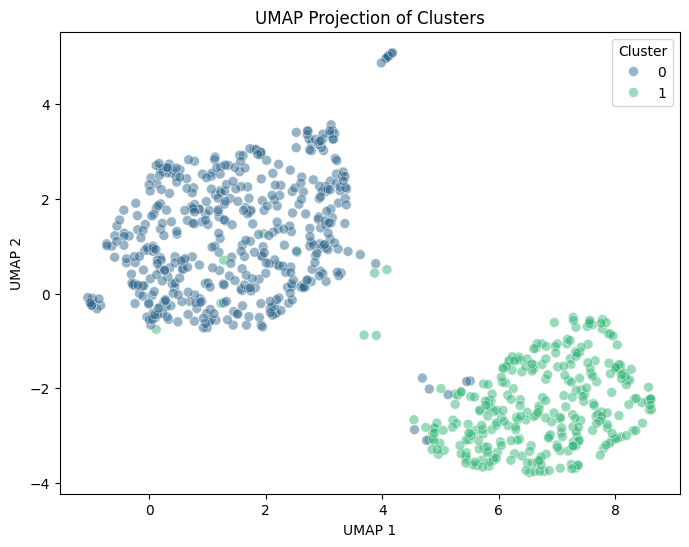

In [10]:
plot_cough_clusters(df_11)

Now let's try with all of the audio files that was deemed to contain coughs

In [19]:
df = pd.concat([pd.read_csv(f"file{i}_output.csv") for i in range(1,13)], ignore_index=True)
df.set_index('filename', inplace=True)
df

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,feature 11,feature 12,feature 13
filename,,,,,,,,,,,,,
/n/home02/ematsumoto/cough_mp3_full/Files_1_mp3/X120013 (Contact 77).mp3,-693.272743,56.136206,-20.944638,2.533271,-1.240830,-7.241315,-0.683520,-8.498120,1.626352,3.820010,-5.924560,-0.154448,-0.016139
/n/home02/ematsumoto/cough_mp3_full/Files_1_mp3/X120022 (Contact 10).mp3,-338.768490,163.554312,-68.727396,1.032950,-12.132019,-36.997744,-10.567027,-22.262195,2.786168,0.403076,-22.783877,3.285068,0.013780
/n/home02/ematsumoto/cough_mp3_full/Files_1_mp3/X120024 (Contact 49).mp3,-479.763656,125.030033,-33.504177,-3.623849,-6.974296,-11.350746,-7.108445,-22.083424,6.216165,3.036253,-17.186462,2.130369,-4.055250
/n/home02/ematsumoto/cough_mp3_full/Files_1_mp3/X120052 (Contact 38).mp3,-446.727986,121.681218,-54.218771,14.310027,-20.903192,-31.306375,3.775018,-23.706667,0.851762,4.275157,-15.770597,15.544062,5.371586
/n/home02/ematsumoto/cough_mp3_full/Files_1_mp3/X120001 (Contact 5).mp3,-505.826945,74.962905,-29.951639,-0.032738,15.226045,-10.487250,-18.735013,-15.953996,-5.076121,-1.891757,-4.436150,0.413986,-1.978785
...,...,...,...,...,...,...,...,...,...,...,...,...,...
/n/home02/ematsumoto/cough_mp3_full/Files_12_mp3/X330147 (Contact 3).mp3,-382.744000,122.915886,-50.575222,2.216145,-24.130911,-40.407618,-2.674205,-20.360639,-11.318923,3.574128,-7.467132,4.532711,-0.887916
/n/home02/ematsumoto/cough_mp3_full/Files_12_mp3/X320193 (Month 8).mp3,-272.511462,96.818839,-29.942318,-26.378298,-22.498569,18.041123,-15.944133,-13.209522,9.641731,5.064521,-7.230937,-6.307503,-10.058792
/n/home02/ematsumoto/cough_mp3_full/Files_12_mp3/X330112 (Contact 9).mp3,-614.105741,97.519413,-25.634834,5.997570,-6.059799,-12.313932,3.550610,-10.592991,1.222639,0.895897,-8.376558,9.216857,0.235194


/n/home02/ematsumoto/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/n/home02/ematsumoto/.local/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


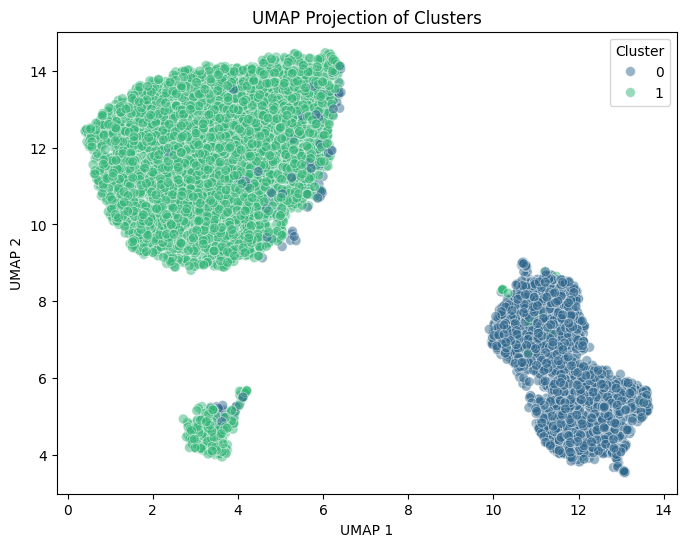

In [20]:
plot_cough_clusters(df)